## Decision Tree Classifier

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
# load iris dataset
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
m = data.data # feature matrix
n = data.target # target variables

In [4]:
# split into train and test set
m_train, m_test, n_train, n_test = train_test_split(m, n, test_size = 0.3, random_state = 2)

In [5]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(m_train, n_train)

DecisionTreeClassifier()

In [6]:
# Checking the training score
Train = clf.score(m_test, n_test)
Train

0.9555555555555556

In [7]:
# Predictions
predictions = clf.predict(m_test)
predictions

array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       0])

In [8]:
n_test

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       0])

In [9]:
# Accuracy
Accuracy = accuracy_score(n_test, predictions)
Accuracy

0.9555555555555556

In [10]:
confusion_matrix(n_test, predictions)

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 12]], dtype=int64)

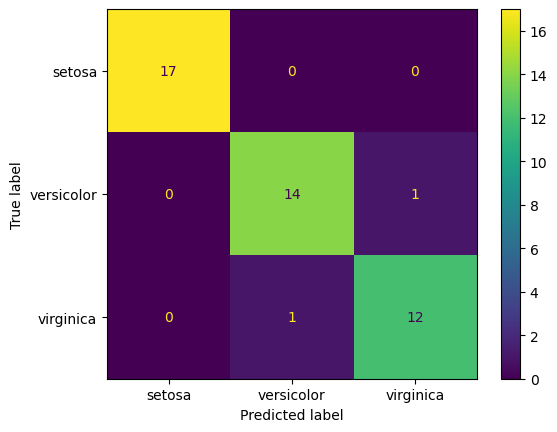

In [11]:
ConfusionMatrixDisplay(confusion_matrix(n_test, predictions),display_labels = ["setosa", "versicolor", "virginica"]).plot()
plt.show()

In [12]:
# Perform 5-fold cross validation
scores = cross_val_score(clf, m_train, n_train, cv = 5, scoring = 'accuracy')

In [13]:
scores

array([0.9047619, 1.       , 1.       , 0.9047619, 1.       ])

In [14]:
scores.mean()

0.9619047619047618

In [15]:
scores.std()

0.046656947481584346

In [16]:
print(f"Decision Tree | Train Accuracy: {Train * 100:.2f}% | Test Accuracy: {Accuracy * 100:.2f}% | Cross Validation Score: {scores.mean() * 100:.2f}%")

Decision Tree | Train Accuracy: 95.56% | Test Accuracy: 95.56% | Cross Validation Score: 96.19%


## K-Nearest Neighbor

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [18]:
# Train knn model
knn.fit(m_train, n_train)

KNeighborsClassifier()

In [19]:
# Training score
train_accuracy = knn.score(m_train, n_train)
train_accuracy

0.9523809523809523

In [20]:
# Predictions
predictions = knn.predict(m_test)

In [21]:
test_accuracy = accuracy_score(n_test, predictions)
test_accuracy

1.0

In [22]:
scores = cross_val_score(knn, m_train, n_train, cv = 5, scoring = "accuracy")

In [23]:
scores

array([0.9047619 , 1.        , 1.        , 0.85714286, 0.95238095])

In [24]:
scores.mean()

0.9428571428571428

In [25]:
scores.std()

0.05553287518900288

In [26]:
print(f"KNN | Train Accuracy: {train_accuracy * 100:.2f}% | Test Accuracy: {test_accuracy * 100:.2f}% | Cross Validation Score:{scores.mean() * 100:.2f}% |")

KNN | Train Accuracy: 95.24% | Test Accuracy: 100.00% | Cross Validation Score:94.29% |


## Breast Cancer Data

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [28]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [29]:
df = pd.DataFrame(data = data.data, columns = data.feature_names)
df["target"] = data.target
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [30]:
df.shape

(569, 31)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [32]:
tn = {
    0:"Malignant",
    1:"Benign"
}

df["target_names"] = df["target"].map(tn)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,Malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,Malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,Malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,Malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,Malignant


In [33]:
df.drop("target_names", axis = 1, inplace = True)

In [34]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [35]:
m = df.drop("target", axis = 1) # Feature matrix
n = df.target # target variables

In [36]:
scaler = StandardScaler()
m_scaled = scaler.fit_transform(m)

In [37]:
m_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [38]:
n.value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [39]:
# Split into train and test
m_train, m_test, n_train, n_test = train_test_split(m_scaled, n, test_size = 0.3, random_state = 42)

- Logistic Regression

In [40]:
# Train Models
clf = LogisticRegression(max_iter = 5000, random_state = 2)
clf.fit(m_train, n_train)

LogisticRegression(max_iter=5000, random_state=2)

In [41]:
# Training Accuracy
clf_train = clf.score(m_train, n_train)
clf_train

0.9874371859296482

In [42]:
# Prediction
predictions = clf.predict(m_test)

In [43]:
# Test Accuracy
clf_test = accuracy_score(n_test, predictions)
clf_test

0.9824561403508771

In [44]:
print(classification_report(n_test, predictions, target_names = data.target_names))

              precision    recall  f1-score   support

   malignant       0.97      0.98      0.98        63
      benign       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [45]:
print(confusion_matrix(n_test, predictions))

[[ 62   1]
 [  2 106]]


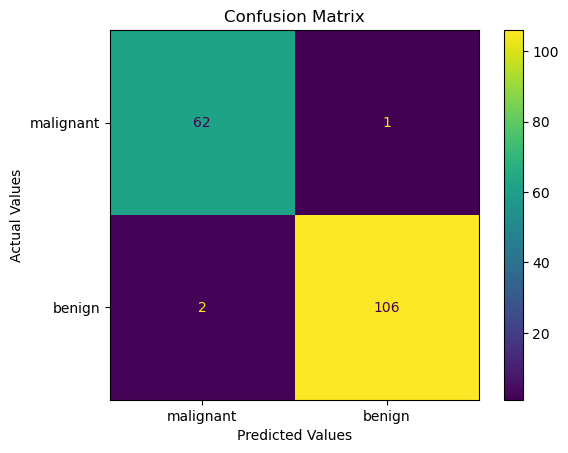

In [46]:
ConfusionMatrixDisplay(confusion_matrix(n_test, predictions), display_labels = data.target_names).plot()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

In [47]:
# sns.heatmap(confusion_matrix(n_test, predictions), annot = True, cmap = "Blues", fmt = "d", xticklabels = data.target_names, yticklabels = data.target_names)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.show()

In [48]:
clf_scores = cross_val_score(clf, m_train, n_train, cv = 5, scoring = 'accuracy')

In [49]:
clf_scores

array([0.975     , 0.975     , 1.        , 0.96202532, 0.96202532])

In [50]:
clf_scores.mean()

0.9748101265822784

In [51]:
clf_scores.std()

0.01386726048342547

In [52]:
print(f"Logistic Regression | Train Accuracy: {clf_train * 100:.2f}% | Test Accuracy: {clf_test * 100:.2f}% | Cross Validation Score: {clf_scores.mean() * 100:.2f}%")

Logistic Regression | Train Accuracy: 98.74% | Test Accuracy: 98.25% | Cross Validation Score: 97.48%


- ## Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5, random_state = 2,max_leaf_nodes = 5, max_features = 5)
dt.fit(m_train, n_train)

DecisionTreeClassifier(max_depth=5, max_features=5, max_leaf_nodes=5,
                       random_state=2)

In [54]:
# Training score
dt_train = dt.score(m_train, n_train)
dt_train

0.964824120603015

In [55]:
# Making Predictions
predictions = dt.predict(m_test)

In [56]:
# Testing score
dt_test = accuracy_score(n_test, predictions)
dt_test

0.9473684210526315

In [57]:
dt_cv_scores = cross_val_score(dt, m_train, n_train, cv = 5, scoring = 'accuracy')

In [58]:
dt_cv_scores

array([0.9625    , 0.9       , 0.9375    , 0.93670886, 0.91139241])

In [59]:
dt_cv_scores.mean()

0.929620253164557

In [60]:
dt_cv_scores.std()

0.021922729591562103

In [61]:
print(classification_report(n_test, predictions, target_names = data.target_names))

              precision    recall  f1-score   support

   malignant       0.91      0.95      0.93        63
      benign       0.97      0.94      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [62]:
print(confusion_matrix(n_test, predictions))

[[ 60   3]
 [  6 102]]


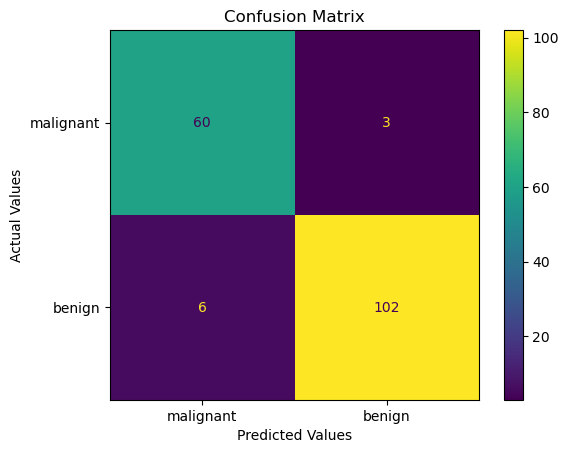

In [63]:
ConfusionMatrixDisplay(confusion_matrix(n_test, predictions), display_labels = data.target_names).plot()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

In [64]:
print(f"Decision Tree | Train Accuracy: {dt_train * 100:.2f}% | Test Accuracy: {dt_test * 100:.2f}% | CV Accuracy : {dt_cv_scores.mean() * 100:.2f}%")

Decision Tree | Train Accuracy: 96.48% | Test Accuracy: 94.74% | CV Accuracy : 92.96%


- ## K-Nearest Neighbor

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(m_train, n_train)

KNeighborsClassifier()

In [66]:
# Train Accuracy
knn_train = knn.score(m_train, n_train)
knn_train

0.9773869346733668

In [67]:
# Predictions
predictions = knn.predict(m_test)

In [68]:
# Test Accuracy
knn_test = accuracy_score(n_test, predictions)
knn_test

0.9590643274853801

In [69]:
knn_cv_scores = cross_val_score(knn, m_train, n_train, cv = 5, scoring = 'accuracy').mean()
knn_cv_scores

0.9547151898734176

In [70]:
print(classification_report(n_test, predictions, target_names = data.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.94      0.94        63
      benign       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [71]:
print(confusion_matrix(n_test, predictions))

[[ 59   4]
 [  3 105]]


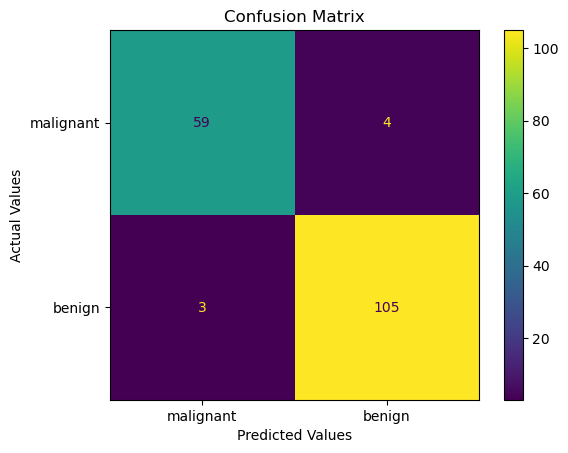

In [72]:
ConfusionMatrixDisplay(confusion_matrix(n_test, predictions), display_labels = data.target_names).plot()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

In [73]:
print(f"K-Nearest Neighbor | Train Accuracy: {knn_train * 100:.2f}% | Test Accuracy: {knn_test * 100:.2f}% | CV Accuracy : {knn_cv_scores.mean() * 100:.2f}%")

K-Nearest Neighbor | Train Accuracy: 97.74% | Test Accuracy: 95.91% | CV Accuracy : 95.47%


- ## Support Vector Machine

In [74]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(m_train, n_train)

SVC()

In [75]:
# Train Accuracy
svm_train = svm.score(m_train, n_train)
svm_train

0.9874371859296482

In [76]:
# Prediction
predictions = svm.predict(m_test)

In [77]:
# Test Accuracy
svm_test = accuracy_score(n_test, predictions)
svm_test

0.9707602339181286

In [78]:
svm_cv_scores = cross_val_score(svm, m_train, n_train, cv = 5, scoring = 'accuracy').mean()
svm_cv_scores

0.9672784810126581

In [79]:
print(classification_report(n_test, predictions, target_names = data.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.97      0.96        63
      benign       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [80]:
print(confusion_matrix(n_test, predictions))

[[ 61   2]
 [  3 105]]


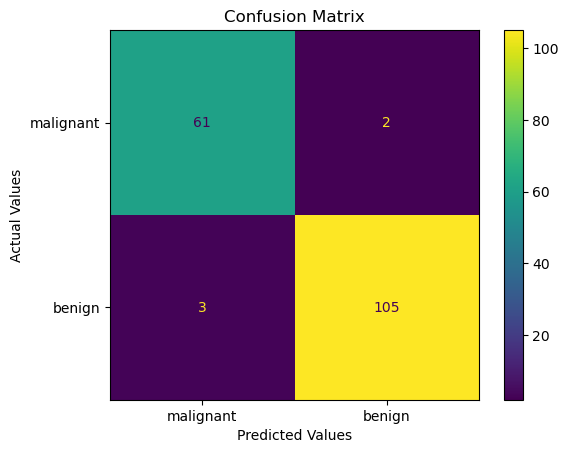

In [81]:
ConfusionMatrixDisplay(confusion_matrix(n_test, predictions), display_labels = data.target_names).plot()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

In [82]:
print(f"Support Vector Machine | Train Accuracy : {svm_train * 100:.2f}% | Test Accuracy : {svm_test * 100:.2f}% | CV Accuracy : {svm_cv_scores * 100:.2f}%")

Support Vector Machine | Train Accuracy : 98.74% | Test Accuracy : 97.08% | CV Accuracy : 96.73%


- ## Random Forest

In [83]:
# Training the Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(m_train, n_train)

RandomForestClassifier(n_estimators=1000)

In [84]:
# Train Accuracy
rf_train = rf.score(m_train, n_train)
rf_train

1.0

In [85]:
# Make Predictions
predictions = rf.predict(m_test)

In [86]:
# Test Accuracy
rf_test = accuracy_score(n_test, predictions)
rf_test

0.9649122807017544

In [87]:
rf_cv_scores = cross_val_score(rf, m_train, n_train, cv = 5, scoring = 'accuracy').mean()
rf_cv_scores

0.9572468354430379

In [88]:
print(classification_report(n_test, predictions, target_names = data.target_names))

              precision    recall  f1-score   support

   malignant       0.97      0.94      0.95        63
      benign       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [89]:
print(confusion_matrix(n_test, predictions))

[[ 59   4]
 [  2 106]]


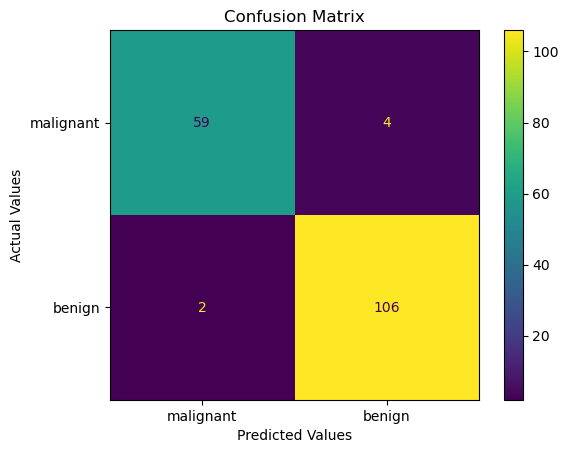

In [90]:
ConfusionMatrixDisplay(confusion_matrix(n_test, predictions), display_labels = data.target_names).plot()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

In [91]:
print(f"Random Forest | Train Accuracy : {rf_train * 100:.2f}% | Test Accuracy : {rf_test * 100:.2f}% | CV Accuracy : {rf_cv_scores * 100:.2f}%")

Random Forest | Train Accuracy : 100.00% | Test Accuracy : 96.49% | CV Accuracy : 95.72%


- ## Naive Bayes

In [92]:
# Training Model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(m_train, n_train)

GaussianNB()

In [93]:
# Train Accuracy
nb_train = nb.score(m_train, n_train)
nb_train

0.9422110552763819

In [94]:
# Predictions
predictions = nb.predict(m_test)

In [95]:
# Test Accuracy
nb_test = accuracy_score(n_test, predictions)
nb_test

0.935672514619883

In [96]:
nb_cv_scores = cross_val_score(nb, m_train, n_train, cv = 5, scoring = 'accuracy').mean()
nb_cv_scores

0.9321835443037975

In [97]:
print(classification_report(n_test, predictions, target_names = data.target_names))

              precision    recall  f1-score   support

   malignant       0.92      0.90      0.91        63
      benign       0.94      0.95      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [98]:
print(confusion_matrix(n_test, predictions))

[[ 57   6]
 [  5 103]]


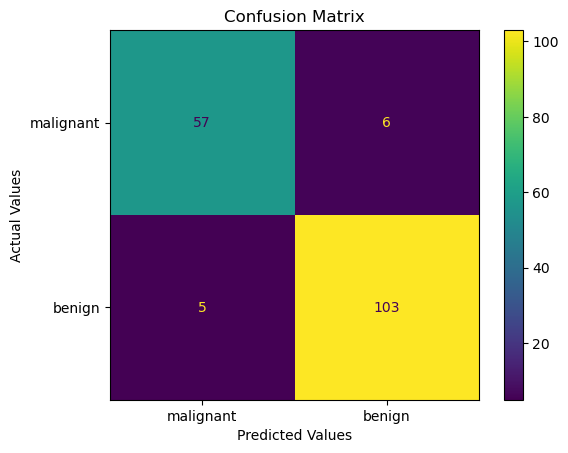

In [99]:
ConfusionMatrixDisplay(confusion_matrix(n_test, predictions), display_labels = data.target_names).plot()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

In [100]:
print(f"Naive Bayes | Train Accuracy : {nb_train * 100:.2f}% | Test Accuracy : {nb_test * 100:.2f}% | CV Accuracy : {nb_cv_scores * 100:.2f}%")

Naive Bayes | Train Accuracy : 94.22% | Test Accuracy : 93.57% | CV Accuracy : 93.22%


- ## Gradient Boosting

In [101]:
# Training Model
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 1.0, random_state = 42)
gb.fit(m_train, n_train)

GradientBoostingClassifier(learning_rate=1.0, n_estimators=1000,
                           random_state=42)

In [102]:
# Train Accuracy
gb_train = gb.score(m_train, n_train)
gb_train

1.0

In [103]:
# Predictions
predictions = gb.predict(m_test)

In [104]:
# Test Accuracy
gb_test = accuracy_score(n_test, predictions)
gb_test

0.9590643274853801

In [105]:
gb_cv_scores = cross_val_score(gb, m_train, n_train, cv = 5, scoring = 'accuracy').mean()
gb_cv_scores

0.9547151898734179

In [106]:
print(classification_report(n_test, predictions, target_names = data.target_names))

              precision    recall  f1-score   support

   malignant       0.94      0.95      0.94        63
      benign       0.97      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [107]:
print(confusion_matrix(n_test, predictions))

[[ 60   3]
 [  4 104]]


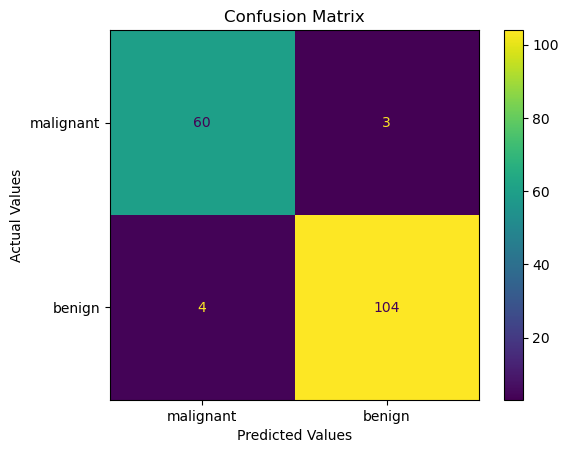

In [108]:
ConfusionMatrixDisplay(confusion_matrix(n_test, predictions), display_labels = data.target_names).plot()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

In [109]:
print(f"Gradient Boosting | Train Accuracy : {gb_train * 100:.2f}% | Test Accuracy : {gb_test * 100:.2f}% | CV Accuracy : {gb_cv_scores * 100:.2f}%")

Gradient Boosting | Train Accuracy : 100.00% | Test Accuracy : 95.91% | CV Accuracy : 95.47%


In [110]:
print("Final Observations:", "\n")
print(f"Logistic Regression | Train Accuracy: {clf_train * 100:.2f}% | Test Accuracy: {clf_test * 100:.2f}% | Cross Validation Score: {clf_scores.mean() * 100:.2f}%", "\n")
print(f"Decision Tree | Train Accuracy: {dt_train * 100:.2f}% | Test Accuracy: {dt_test * 100:.2f}% | CV Accuracy : {dt_cv_scores.mean() * 100:.2f}%", "\n")
print(f"K-Nearest Neighbor | Train Accuracy: {knn_train * 100:.2f}% | Test Accuracy: {knn_test * 100:.2f}% | CV Accuracy : {knn_cv_scores.mean() * 100:.2f}%", "\n")
print(f"Support Vector Machine | Train Accuracy : {svm_train * 100:.2f}% | Test Accuracy : {svm_test * 100:.2f}% | CV Accuracy : {svm_cv_scores * 100:.2f}%", "\n")
print(f"Random Forest | Train Accuracy : {rf_train * 100:.2f}% | Test Accuracy : {rf_test * 100:.2f}% | CV Accuracy : {rf_cv_scores * 100:.2f}%", "\n")
print(f"Naive Bayes | Train Accuracy : {nb_train * 100:.2f}% | Test Accuracy : {nb_test * 100:.2f}% | CV Accuracy : {nb_cv_scores * 100:.2f}%", "\n")
print(f"Gradient Boosting | Train Accuracy : {gb_train * 100:.2f}% | Test Accuracy : {gb_test * 100:.2f}% | CV Accuracy : {gb_cv_scores * 100:.2f}%", "\n")

Final Observations: 

Logistic Regression | Train Accuracy: 98.74% | Test Accuracy: 98.25% | Cross Validation Score: 97.48% 

Decision Tree | Train Accuracy: 96.48% | Test Accuracy: 94.74% | CV Accuracy : 92.96% 

K-Nearest Neighbor | Train Accuracy: 97.74% | Test Accuracy: 95.91% | CV Accuracy : 95.47% 

Support Vector Machine | Train Accuracy : 98.74% | Test Accuracy : 97.08% | CV Accuracy : 96.73% 

Random Forest | Train Accuracy : 100.00% | Test Accuracy : 96.49% | CV Accuracy : 95.72% 

Naive Bayes | Train Accuracy : 94.22% | Test Accuracy : 93.57% | CV Accuracy : 93.22% 

Gradient Boosting | Train Accuracy : 100.00% | Test Accuracy : 95.91% | CV Accuracy : 95.47% 

